In [1]:
import pandas as pd
import numpy as np

# to avoid warnings
import warnings
warnings.filterwarnings("ignore")

# for database gatherings 
import sqlalchemy as sa

# for Visualization Purpose
import matplotlib.pyplot as plt
import seaborn as sns

# For evaluation 
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For different algorithm
# this Regression so we can use regression algo-linear,DT,random forest,adaboost and knn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.impute import KNNImputer

# For feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from scipy.stats import zscore

In [2]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
df=df.drop(['Date'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [6]:
x= df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Evaporation','Sunshine'],axis=1)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustSpeed  135197 non-null  float64
 4   WindSpeed9am   143693 non-null  float64
 5   WindSpeed3pm   142398 non-null  float64
 6   Humidity9am    142806 non-null  float64
 7   Humidity3pm    140953 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Cloud9am       89572 non-null   float64
 11  Cloud3pm       86102 non-null   float64
 12  Temp9am        143693 non-null  float64
 13  Temp3pm        141851 non-null  float64
dtypes: float64(14)
memory usage: 15.5 MB


In [8]:
 r = x.head(5000)

In [9]:
r

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.6,19.3,0.0,30.0,19.0,2.0,56.0,33.0,1029.9,1027.2,NaN,NaN,12.0,19.2
4996,2.3,18.4,0.0,22.0,6.0,9.0,83.0,54.0,1032.2,1029.3,NaN,NaN,9.3,17.8
4997,2.4,21.3,0.0,13.0,2.0,4.0,100.0,37.0,1029.9,1024.4,NaN,NaN,8.6,20.6
4998,4.5,22.6,0.0,35.0,6.0,20.0,79.0,28.0,1022.5,1017.9,NaN,NaN,9.6,21.2


In [10]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        4975 non-null   float64
 1   MaxTemp        4981 non-null   float64
 2   Rainfall       4917 non-null   float64
 3   WindGustSpeed  4925 non-null   float64
 4   WindSpeed9am   4962 non-null   float64
 5   WindSpeed3pm   4959 non-null   float64
 6   Humidity9am    4970 non-null   float64
 7   Humidity3pm    4966 non-null   float64
 8   Pressure9am    4977 non-null   float64
 9   Pressure3pm    4966 non-null   float64
 10  Cloud9am       1289 non-null   float64
 11  Cloud3pm       1427 non-null   float64
 12  Temp9am        4970 non-null   float64
 13  Temp3pm        4966 non-null   float64
dtypes: float64(14)
memory usage: 547.0 KB


In [11]:
Knn_wea = KNNImputer()
array = Knn_wea.fit_transform(r)
array

array([[13.4, 22.9,  0.6, ...,  3.4, 16.9, 21.8],
       [ 7.4, 25.1,  0. , ...,  4.8, 17.2, 24.3],
       [12.9, 25.7,  0. , ...,  2. , 21. , 23.2],
       ...,
       [ 2.4, 21.3,  0. , ...,  2.2,  8.6, 20.6],
       [ 4.5, 22.6,  0. , ...,  4. ,  9.6, 21.2],
       [ 1.6, 14.7,  0. , ...,  4. ,  9.7, 13.6]])

In [12]:
df1 = pd.DataFrame(array,columns = r.columns)
df1

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,3.4,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.2,4.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.4,2.0,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.6,4.2,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.6,19.3,0.0,30.0,19.0,2.0,56.0,33.0,1029.9,1027.2,6.2,3.0,12.0,19.2
4996,2.3,18.4,0.0,22.0,6.0,9.0,83.0,54.0,1032.2,1029.3,4.8,2.8,9.3,17.8
4997,2.4,21.3,0.0,13.0,2.0,4.0,100.0,37.0,1029.9,1024.4,4.8,2.2,8.6,20.6
4998,4.5,22.6,0.0,35.0,6.0,20.0,79.0,28.0,1022.5,1017.9,5.8,4.0,9.6,21.2


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        5000 non-null   float64
 1   MaxTemp        5000 non-null   float64
 2   Rainfall       5000 non-null   float64
 3   WindGustSpeed  5000 non-null   float64
 4   WindSpeed9am   5000 non-null   float64
 5   WindSpeed3pm   5000 non-null   float64
 6   Humidity9am    5000 non-null   float64
 7   Humidity3pm    5000 non-null   float64
 8   Pressure9am    5000 non-null   float64
 9   Pressure3pm    5000 non-null   float64
 10  Cloud9am       5000 non-null   float64
 11  Cloud3pm       5000 non-null   float64
 12  Temp9am        5000 non-null   float64
 13  Temp3pm        5000 non-null   float64
dtypes: float64(14)
memory usage: 547.0 KB


In [14]:
z = df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Evaporation','Sunshine']].head(5000)
z

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Evaporation,Sunshine
0,Albury,W,W,WNW,No,No,NaN,NaN
1,Albury,WNW,NNW,WSW,No,No,NaN,NaN
2,Albury,WSW,W,WSW,No,No,NaN,NaN
3,Albury,NE,SE,E,No,No,NaN,NaN
4,Albury,W,ENE,NW,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...
4995,BadgerysCreek,SW,SW,S,No,No,NaN,NaN
4996,BadgerysCreek,E,WSW,NNE,No,No,NaN,NaN
4997,BadgerysCreek,ENE,NNW,NE,No,No,NaN,NaN
4998,BadgerysCreek,WSW,WNW,W,No,No,NaN,NaN


In [15]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      5000 non-null   object 
 1   WindGustDir   4925 non-null   object 
 2   WindDir9am    4153 non-null   object 
 3   WindDir3pm    4900 non-null   object 
 4   RainToday     4917 non-null   object 
 5   RainTomorrow  4917 non-null   object 
 6   Evaporation   0 non-null      float64
 7   Sunshine      0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 312.6+ KB


In [16]:
z.isna().sum()

Location           0
WindGustDir       75
WindDir9am       847
WindDir3pm       100
RainToday         83
RainTomorrow      83
Evaporation     5000
Sunshine        5000
dtype: int64

In [17]:
z['Location'].value_counts()

Albury           3040
BadgerysCreek    1960
Name: Location, dtype: int64

In [18]:
z['WindGustDir']

0         W
1       WNW
2       WSW
3        NE
4         W
       ... 
4995     SW
4996      E
4997    ENE
4998    WSW
4999    SSW
Name: WindGustDir, Length: 5000, dtype: object

In [19]:
z['WindGustDir']= z['WindGustDir'].fillna(z['WindGustDir'].mode()[0])

In [20]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      5000 non-null   object 
 1   WindGustDir   5000 non-null   object 
 2   WindDir9am    4153 non-null   object 
 3   WindDir3pm    4900 non-null   object 
 4   RainToday     4917 non-null   object 
 5   RainTomorrow  4917 non-null   object 
 6   Evaporation   0 non-null      float64
 7   Sunshine      0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 312.6+ KB


In [21]:
z['WindDir9am']= z['WindDir9am'].fillna(z['WindDir9am'].mode()[0])

In [22]:
z['WindDir3pm']= z['WindDir3pm'].fillna(z['WindDir3pm'].mode()[0])

In [23]:
z['RainToday']= z['RainToday'].fillna(z['RainToday'].mode()[0])

In [24]:
z['RainTomorrow']= z['RainTomorrow'].fillna(z['RainTomorrow'].mode()[0])

In [25]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      5000 non-null   object 
 1   WindGustDir   5000 non-null   object 
 2   WindDir9am    5000 non-null   object 
 3   WindDir3pm    5000 non-null   object 
 4   RainToday     5000 non-null   object 
 5   RainTomorrow  5000 non-null   object 
 6   Evaporation   0 non-null      float64
 7   Sunshine      0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 312.6+ KB


In [26]:
z['Evaporation'].unique()

array([nan])

In [27]:
z = z.drop(['RainToday'],axis= 1)

In [28]:
z

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow,Evaporation,Sunshine
0,Albury,W,W,WNW,No,NaN,NaN
1,Albury,WNW,NNW,WSW,No,NaN,NaN
2,Albury,WSW,W,WSW,No,NaN,NaN
3,Albury,NE,SE,E,No,NaN,NaN
4,Albury,W,ENE,NW,No,NaN,NaN
...,...,...,...,...,...,...,...
4995,BadgerysCreek,SW,SW,S,No,NaN,NaN
4996,BadgerysCreek,E,WSW,NNE,No,NaN,NaN
4997,BadgerysCreek,ENE,NNW,NE,No,NaN,NaN
4998,BadgerysCreek,WSW,WNW,W,No,NaN,NaN


In [29]:
df = pd.concat([df1,z],axis = 1)

In [30]:
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow,Evaporation,Sunshine
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,3.4,16.9,21.8,Albury,W,W,WNW,No,NaN,NaN
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,4.8,17.2,24.3,Albury,WNW,NNW,WSW,No,NaN,NaN
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,2.0,21.0,23.2,Albury,WSW,W,WSW,No,NaN,NaN
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,4.2,18.1,26.5,Albury,NE,SE,E,No,NaN,NaN
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,8.0,17.8,29.7,Albury,W,ENE,NW,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.6,19.3,0.0,30.0,19.0,2.0,56.0,33.0,1029.9,1027.2,...,3.0,12.0,19.2,BadgerysCreek,SW,SW,S,No,NaN,NaN
4996,2.3,18.4,0.0,22.0,6.0,9.0,83.0,54.0,1032.2,1029.3,...,2.8,9.3,17.8,BadgerysCreek,E,WSW,NNE,No,NaN,NaN
4997,2.4,21.3,0.0,13.0,2.0,4.0,100.0,37.0,1029.9,1024.4,...,2.2,8.6,20.6,BadgerysCreek,ENE,NNW,NE,No,NaN,NaN
4998,4.5,22.6,0.0,35.0,6.0,20.0,79.0,28.0,1022.5,1017.9,...,4.0,9.6,21.2,BadgerysCreek,WSW,WNW,W,No,NaN,NaN


### outliers

<AxesSubplot:>

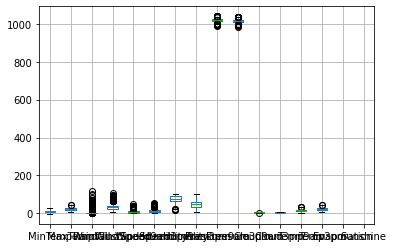

In [31]:

df.boxplot(figsize=(20,10))

In [32]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location',
       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow',
       'Evaporation', 'Sunshine'],
      dtype='object')

### MaxTemp

<AxesSubplot:>

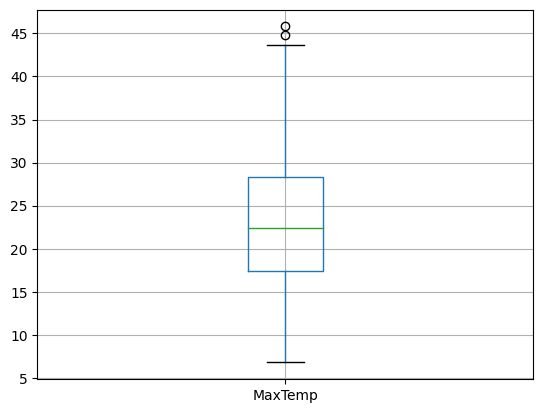

In [33]:
df[['MaxTemp']].boxplot()  

In [34]:
df['MaxTemp'] = df['MaxTemp'].apply(lambda x:np.sqrt(x))    # used sqrt transformation 

<AxesSubplot:>

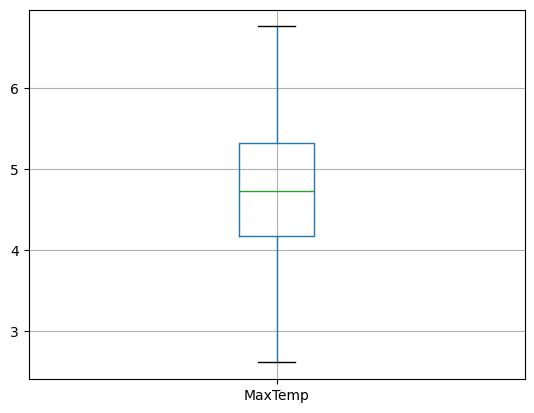

In [35]:
df[['MaxTemp']].boxplot()

<AxesSubplot:>

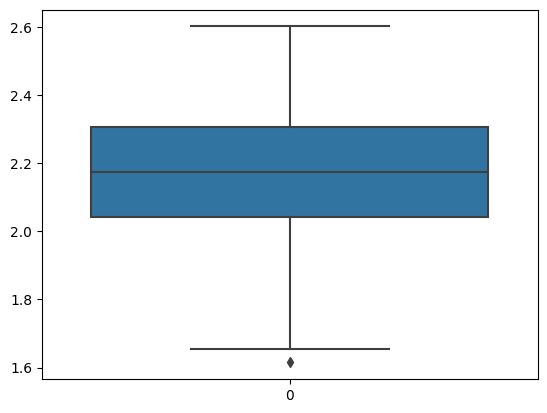

In [36]:
sns.boxplot(np.sqrt(df['MaxTemp']))

### Rainfall

<AxesSubplot:>

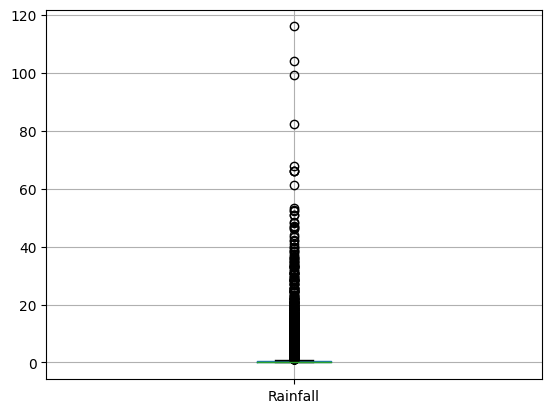

In [37]:
df[['Rainfall']].boxplot()  

### WindGustSpeed

<AxesSubplot:>

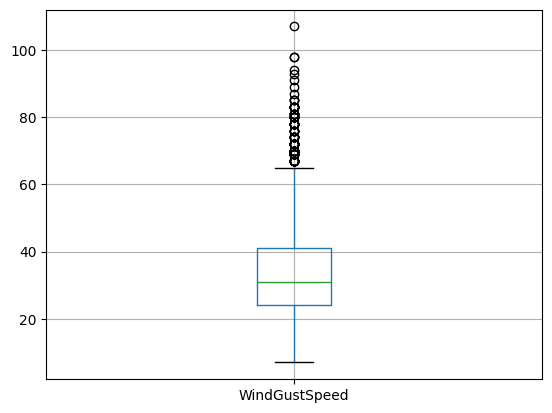

In [38]:
df[['WindGustSpeed']].boxplot()     

In [39]:
# by using z_score 

z_scorevalue = np.abs(zscore(df['WindGustSpeed']))     
z_scorevalue

0       0.808704
1       0.808704
2       0.960327
3       0.707532
4       0.581269
          ...   
4995    0.252661
4996    0.859156
4997    1.541462
4998    0.126398
4999    0.025226
Name: WindGustSpeed, Length: 5000, dtype: float64

In [40]:
array = np.where(z_scorevalue > 2)
array 

array1 = df['WindGustSpeed'].to_numpy()
array1[array]= df['WindGustSpeed'].median()
df[['WindGustSpeed']].iloc[array]


,WindGustSpeed
8,31.0
12,31.0
17,31.0
50,31.0
51,31.0
...,...
4955,31.0
4956,31.0
4966,31.0
4974,31.0


<AxesSubplot:>

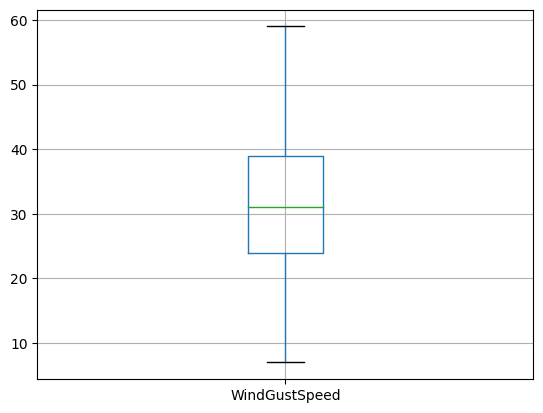

In [41]:
df[['WindGustSpeed']].boxplot()

### WindSpeed9am

<AxesSubplot:>

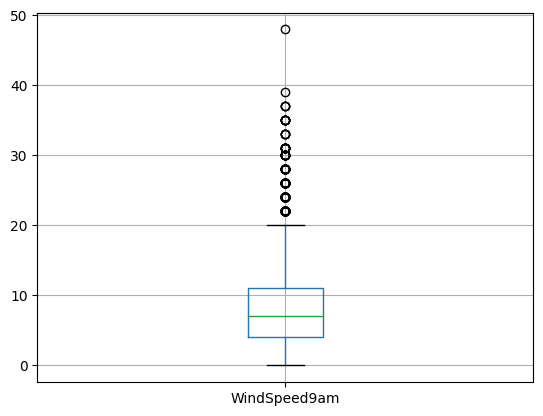

In [42]:
df[['WindSpeed9am']].boxplot()

### by using IQR method 


In [43]:
q1=df["WindSpeed9am"].quantile(0.25)
q3=df["WindSpeed9am"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
print(upper_limit)

21.5


<AxesSubplot:>

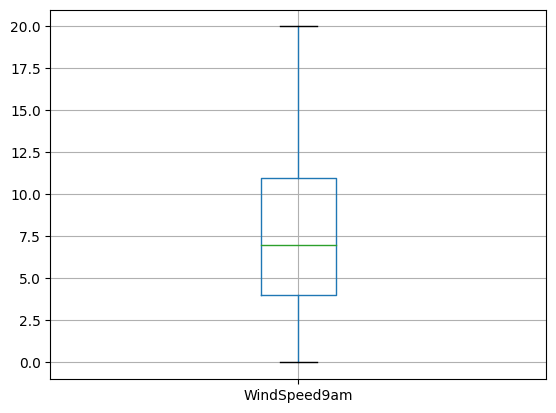

In [44]:
df[["WindSpeed9am"]].loc[df["WindSpeed9am"]>upper_limit]
df.loc[df["WindSpeed9am"]>upper_limit,"WindSpeed9am"]=df["WindSpeed9am"].median()
df[["WindSpeed9am"]].loc[df["WindSpeed9am"]>upper_limit]
df[["WindSpeed9am"]].boxplot()

34.0


<AxesSubplot:>

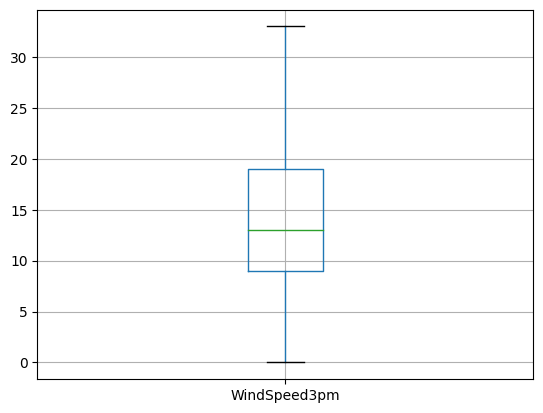

In [45]:
q1=df["WindSpeed3pm"].quantile(0.25)
q3=df["WindSpeed3pm"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
print(upper_limit)

df[["WindSpeed3pm"]].loc[df["WindSpeed3pm"]>upper_limit]
df.loc[df["WindSpeed3pm"]>upper_limit,"WindSpeed3pm"]=df["WindSpeed3pm"].median()
df[["WindSpeed3pm"]].loc[df["WindSpeed3pm"]>upper_limit]
df[["WindSpeed3pm"]].boxplot()

In [46]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location',
       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow',
       'Evaporation', 'Sunshine'],
      dtype='object')

<AxesSubplot:>

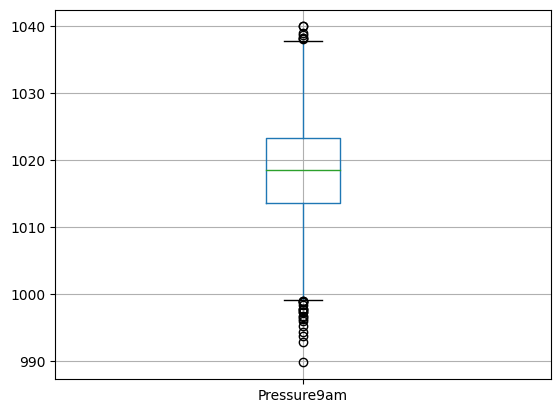

In [47]:
df[["Pressure9am"]].boxplot()

In [48]:
q1=df["Pressure9am"].quantile(0.25)
q3=df["Pressure9am"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)


1037.85
999.0500000000002


In [49]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Evaporation,Sunshine
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.0,0.0
mean,10.018077,4.744753,2.023087,31.798343,7.341784,14.083194,75.080026,49.011589,1018.445813,1015.762381,5.621989,4.688728,15.103198,21.725959,NaN,NaN
std,5.944888,0.743210,6.525054,10.794559,5.459800,6.890484,17.141122,19.315271,7.171459,7.014130,1.832475,2.110869,5.898560,6.910614,NaN,NaN
min,-3.000000,2.607681,0.000000,7.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.000000,1.000000,0.300000,6.400000,NaN,NaN
25%,5.300000,4.171331,0.000000,24.000000,4.000000,9.000000,63.000000,35.000000,1013.600000,1010.900000,4.400000,3.000000,10.475000,16.200000,NaN,NaN
50%,9.900000,4.732864,0.000000,31.000000,7.000000,13.000000,76.000000,48.000000,1018.500000,1015.700000,5.700000,4.400000,15.200000,21.100000,NaN,NaN
75%,14.900000,5.319774,0.400000,39.000000,11.000000,19.000000,89.000000,61.000000,1023.300000,1020.500000,7.200000,6.400000,19.600000,26.700000,NaN,NaN
max,28.300000,6.767570,116.000000,59.000000,20.000000,33.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,34.500000,43.700000,NaN,NaN


,Pressure9am


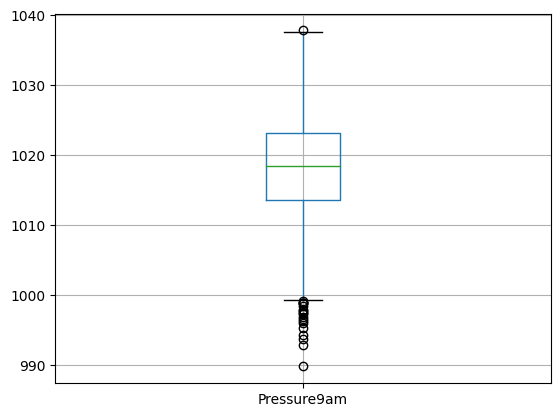

In [50]:
df[["Pressure9am"]].loc[df["Pressure9am"]>upper_limit]
df.loc[df["Pressure9am"]>upper_limit,"Pressure9am"]=df["Pressure9am"].mean()
df[["Pressure9am"]].loc[df["Pressure9am"]>upper_limit]
df[["Pressure9am"]].boxplot()
df[["Pressure9am"]].loc[df["Pressure9am"]>upper_limit]

,Pressure9am


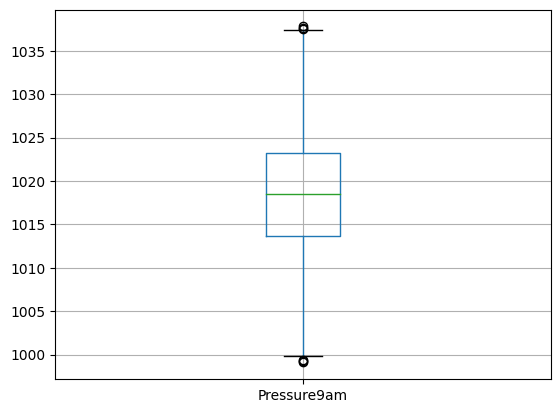

In [51]:
df[["Pressure9am"]].loc[df["Pressure9am"]<lower_limit]
df.loc[df["Pressure9am"]<lower_limit,"Pressure9am"]=df["Pressure9am"].mean()
df[["Pressure9am"]].loc[df["Pressure9am"]<lower_limit]
df[["Pressure9am"]].boxplot()
df[["Pressure9am"]].loc[df["Pressure9am"]<lower_limit]

<AxesSubplot:>

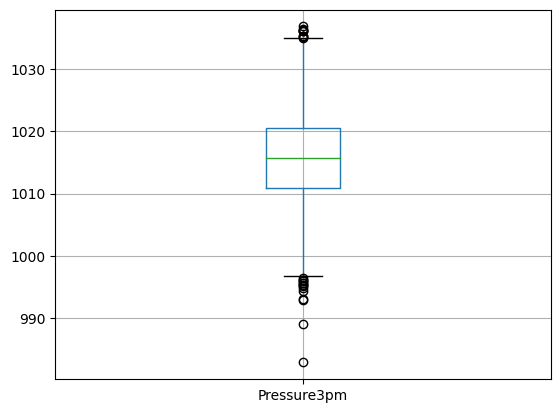

In [52]:
df[["Pressure3pm"]].boxplot()

In [53]:
q1=df["Pressure3pm"].quantile(0.25)
q3=df["Pressure3pm"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)


1034.9
996.5


In [54]:
df[["Pressure3pm"]].loc[df["Pressure3pm"]>upper_limit]
df.loc[df["Pressure3pm"]>upper_limit,"Pressure3pm"]=upper_limit
df[["Pressure3pm"]].loc[df["Pressure3pm"]>upper_limit]
# df[["Pressure3pm"]].boxplot()
df[["Pressure3pm"]].loc[df["Pressure3pm"]>upper_limit]

,Pressure3pm


In [55]:
df[["Pressure3pm"]].loc[df["Pressure3pm"]<lower_limit]
df.loc[df["Pressure3pm"]<lower_limit,"Pressure3pm"]=lower_limit
df[["Pressure3pm"]].loc[df["Pressure3pm"]<lower_limit]
# df[["Pressure3pm"]].boxplot()
df[["Pressure3pm"]].loc[df["Pressure3pm"]<lower_limit]

,Pressure3pm


<AxesSubplot:>

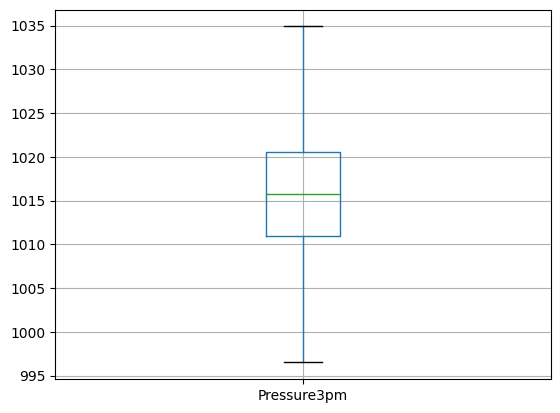

In [56]:
df[["Pressure3pm"]].boxplot()

In [57]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location',
       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow',
       'Evaporation', 'Sunshine'],
      dtype='object')

<AxesSubplot:>

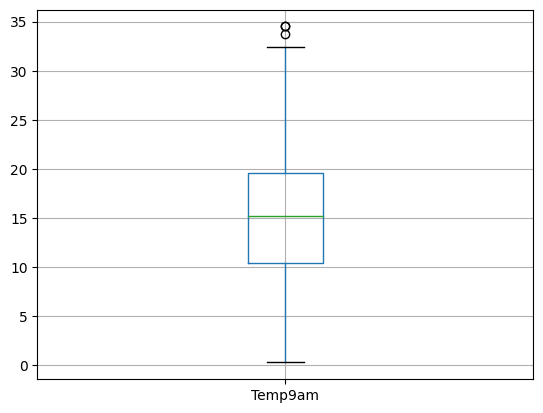

In [58]:
df[["Temp9am"]].boxplot()

### encoading

In [59]:
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow,Evaporation,Sunshine
0,13.4,4.785394,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,3.4,16.9,21.8,Albury,W,W,WNW,No,NaN,NaN
1,7.4,5.009990,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,4.8,17.2,24.3,Albury,WNW,NNW,WSW,No,NaN,NaN
2,12.9,5.069517,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,2.0,21.0,23.2,Albury,WSW,W,WSW,No,NaN,NaN
3,9.2,5.291503,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,4.2,18.1,26.5,Albury,NE,SE,E,No,NaN,NaN
4,17.5,5.683309,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,8.0,17.8,29.7,Albury,W,ENE,NW,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.6,4.393177,0.0,30.0,19.0,2.0,56.0,33.0,1029.9,1027.2,...,3.0,12.0,19.2,BadgerysCreek,SW,SW,S,No,NaN,NaN
4996,2.3,4.289522,0.0,22.0,6.0,9.0,83.0,54.0,1032.2,1029.3,...,2.8,9.3,17.8,BadgerysCreek,E,WSW,NNE,No,NaN,NaN
4997,2.4,4.615192,0.0,13.0,2.0,4.0,100.0,37.0,1029.9,1024.4,...,2.2,8.6,20.6,BadgerysCreek,ENE,NNW,NE,No,NaN,NaN
4998,4.5,4.753946,0.0,35.0,6.0,20.0,79.0,28.0,1022.5,1017.9,...,4.0,9.6,21.2,BadgerysCreek,WSW,WNW,W,No,NaN,NaN


In [60]:
df.drop(["Evaporation","Sunshine"],axis=1,inplace=True)

In [61]:
df=pd.get_dummies(df,columns=["Location","WindGustDir","WindDir9am","WindDir3pm"])

In [62]:
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,4.785394,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,5.009990,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,5.069517,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,5.291503,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,5.683309,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.6,4.393177,0.0,30.0,19.0,2.0,56.0,33.0,1029.9,1027.2,...,0,0,1,0,0,0,0,0,0,0
4996,2.3,4.289522,0.0,22.0,6.0,9.0,83.0,54.0,1032.2,1029.3,...,0,0,0,0,0,0,0,0,0,0
4997,2.4,4.615192,0.0,13.0,2.0,4.0,100.0,37.0,1029.9,1024.4,...,0,0,0,0,0,0,0,0,0,0
4998,4.5,4.753946,0.0,35.0,6.0,20.0,79.0,28.0,1022.5,1017.9,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MinTemp                 5000 non-null   float64
 1   MaxTemp                 5000 non-null   float64
 2   Rainfall                5000 non-null   float64
 3   WindGustSpeed           5000 non-null   float64
 4   WindSpeed9am            5000 non-null   float64
 5   WindSpeed3pm            5000 non-null   float64
 6   Humidity9am             5000 non-null   float64
 7   Humidity3pm             5000 non-null   float64
 8   Pressure9am             5000 non-null   float64
 9   Pressure3pm             5000 non-null   float64
 10  Cloud9am                5000 non-null   float64
 11  Cloud3pm                5000 non-null   float64
 12  Temp9am                 5000 non-null   float64
 13  Temp3pm                 5000 non-null   float64
 14  RainTomorrow            5000 non-null   

In [64]:
df["RainTomorrow"].value_counts()

No     4004
Yes     996
Name: RainTomorrow, dtype: int64

### sampling

In [65]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
smote_over_samp=SMOTE(k_neighbors=5,random_state=2,sampling_strategy=0.8)
x_sample,y_sample=smote_over_samp.fit_resample(x,y)

In [68]:
y_sample.value_counts()

No     4004
Yes    3203
Name: RainTomorrow, dtype: int64

In [69]:
x=x_sample
y=y_sample

### train test split

In [70]:
x=x_sample
y=y_sample

In [71]:
x
y

0        No
1        No
2        No
3        No
4        No
       ... 
7202    Yes
7203    Yes
7204    Yes
7205    Yes
7206    Yes
Name: RainTomorrow, Length: 7207, dtype: object

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3,stratify=y)

In [73]:
y_test.value_counts()

No     801
Yes    641
Name: RainTomorrow, dtype: int64

In [74]:
# x_train.info()
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 5765 entries, 6931 to 2464
Series name: RainTomorrow
Non-Null Count  Dtype 
--------------  ----- 
5765 non-null   object
dtypes: object(1)
memory usage: 90.1+ KB


In [75]:
model_name=[]
testing_acc=[]
training_acc=[]
parameter=[]

### model training

In [76]:
Logistic_model=LogisticRegression()
Logistic_model.fit(x_train,y_train)

LogisticRegression()

### model evolution 

In [77]:
y_pred=Logistic_model.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("Logistic_model")
parameter.append("defalt")


confusion matrix is
 [[682 161]
 [119 480]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.85      0.81      0.83       843
         Yes       0.75      0.80      0.77       599

    accuracy                           0.81      1442
   macro avg       0.80      0.81      0.80      1442
weighted avg       0.81      0.81      0.81      1442

________________________________________
aacuracy of model is 0.8058252427184466


In [78]:
y_pred=Logistic_model.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[2739  630]
 [ 464 1932]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.86      0.81      0.83      3369
         Yes       0.75      0.81      0.78      2396

    accuracy                           0.81      5765
   macro avg       0.80      0.81      0.81      5765
weighted avg       0.81      0.81      0.81      5765

________________________________________
aacuracy of model is 0.8102341717259324


### by using knn_model

In [79]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
y_pred=knn_model.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("knn_model")
parameter.append("defalt")


confusion matrix is
 [[623  55]
 [178 586]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.78      0.92      0.84       678
         Yes       0.91      0.77      0.83       764

    accuracy                           0.84      1442
   macro avg       0.85      0.84      0.84      1442
weighted avg       0.85      0.84      0.84      1442

________________________________________
aacuracy of model is 0.8384188626907073


In [81]:
y_pred=knn_model.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[2763   96]
 [ 440 2466]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.86      0.97      0.91      2859
         Yes       0.96      0.85      0.90      2906

    accuracy                           0.91      5765
   macro avg       0.91      0.91      0.91      5765
weighted avg       0.91      0.91      0.91      5765

________________________________________
aacuracy of model is 0.9070251517779705


### by Decision Tree

In [82]:
D_tree=DecisionTreeClassifier()
D_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
y_pred=D_tree.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("D_tree")
parameter.append("defalt")


confusion matrix is
 [[692 116]
 [109 525]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.86      0.86      0.86       808
         Yes       0.82      0.83      0.82       634

    accuracy                           0.84      1442
   macro avg       0.84      0.84      0.84      1442
weighted avg       0.84      0.84      0.84      1442

________________________________________
aacuracy of model is 0.8439667128987517


In [84]:
y_pred=D_tree.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[3203    0]
 [   0 2562]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      3203
         Yes       1.00      1.00      1.00      2562

    accuracy                           1.00      5765
   macro avg       1.00      1.00      1.00      5765
weighted avg       1.00      1.00      1.00      5765

________________________________________
aacuracy of model is 1.0


### by using Random forest

In [85]:
Random_for=RandomForestClassifier()
Random_for.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred=Random_for.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("Random_forest")
parameter.append("defalt")


confusion matrix is
 [[735  87]
 [ 66 554]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.92      0.89      0.91       822
         Yes       0.86      0.89      0.88       620

    accuracy                           0.89      1442
   macro avg       0.89      0.89      0.89      1442
weighted avg       0.89      0.89      0.89      1442

________________________________________
aacuracy of model is 0.8938973647711512


In [87]:
y_pred=Random_for.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[3203    0]
 [   0 2562]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      3203
         Yes       1.00      1.00      1.00      2562

    accuracy                           1.00      5765
   macro avg       1.00      1.00      1.00      5765
weighted avg       1.00      1.00      1.00      5765

________________________________________
aacuracy of model is 1.0


### by Adaboost model

In [88]:
Adaboost_model=AdaBoostClassifier()
Adaboost_model.fit(x_train,y_train)

AdaBoostClassifier()

In [89]:
y_pred=Adaboost_model.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("Adaboost_model")
parameter.append("defalt")


confusion matrix is
 [[735 100]
 [ 66 541]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.92      0.88      0.90       835
         Yes       0.84      0.89      0.87       607

    accuracy                           0.88      1442
   macro avg       0.88      0.89      0.88      1442
weighted avg       0.89      0.88      0.89      1442

________________________________________
aacuracy of model is 0.8848821081830791


In [90]:
y_pred=Adaboost_model.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[2951  352]
 [ 252 2210]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.92      0.89      0.91      3303
         Yes       0.86      0.90      0.88      2462

    accuracy                           0.90      5765
   macro avg       0.89      0.90      0.89      5765
weighted avg       0.90      0.90      0.90      5765

________________________________________
aacuracy of model is 0.8952298352124891


### knn_model with hyperparameter tunning

In [91]:
knn_model=KNeighborsClassifier()

hyperparameters={"n_neighbors":np.arange(3,30),"p":[1,2]}

gscv=GridSearchCV(knn_model,hyperparameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [92]:
knn_hyp_model=gscv.best_estimator_
knn_hyp_model

KNeighborsClassifier(n_neighbors=4)

In [93]:
parameters=gscv.best_params_
parameters

{'n_neighbors': 4, 'p': 2}

In [94]:
y_pred=knn_hyp_model.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("knn_hyp_model")
parameter.append(parameters)


confusion matrix is
 [[676  78]
 [125 563]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.84      0.90      0.87       754
         Yes       0.88      0.82      0.85       688

    accuracy                           0.86      1442
   macro avg       0.86      0.86      0.86      1442
weighted avg       0.86      0.86      0.86      1442

________________________________________
aacuracy of model is 0.8592233009708737


In [95]:
y_pred=knn_hyp_model.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[2957  124]
 [ 246 2438]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.92      0.96      0.94      3081
         Yes       0.95      0.91      0.93      2684

    accuracy                           0.94      5765
   macro avg       0.94      0.93      0.94      5765
weighted avg       0.94      0.94      0.94      5765

________________________________________
aacuracy of model is 0.9358196010407632


### Decision_tree with hyperparameter tunning

In [96]:
D_tree=DecisionTreeClassifier(random_state=7)
# criterion='gini',
#     splitter='best',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,

hyperparameter={"criterion":["gini","entropy"],"max_depth":np.arange(1,20),"min_samples_split":np.arange(2,15),
               "min_samples_leaf":np.arange(1,20)}

gscv=RandomizedSearchCV(D_tree,hyperparameter,cv=5)
gscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [97]:
D_tree_hyp_model=gscv.best_estimator_
D_tree_hyp_model

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       min_samples_split=10, random_state=7)

In [98]:
parameters=gscv.best_params_
parameters

{'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 15,
 'criterion': 'entropy'}

In [99]:
y_pred=D_tree_hyp_model.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("D_tree_hyp_model")
parameter.append(parameters)


confusion matrix is
 [[671 105]
 [130 536]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.84      0.86      0.85       776
         Yes       0.84      0.80      0.82       666

    accuracy                           0.84      1442
   macro avg       0.84      0.83      0.84      1442
weighted avg       0.84      0.84      0.84      1442

________________________________________
aacuracy of model is 0.8370319001386962


In [100]:
y_pred=D_tree_hyp_model.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[3057  157]
 [ 146 2405]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.95      0.95      0.95      3214
         Yes       0.94      0.94      0.94      2551

    accuracy                           0.95      5765
   macro avg       0.95      0.95      0.95      5765
weighted avg       0.95      0.95      0.95      5765

________________________________________
aacuracy of model is 0.9474414570685169


### D_tree with post prunning

In [101]:
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [102]:
result=d_tree.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_lst=result["ccp_alphas"]

In [103]:
testing_accuracy=[]
training_accuracy=[]
for i in ccp_alpha_lst:
    
    D_tree=DecisionTreeClassifier(ccp_alpha=i,random_state=7)
    D_tree.fit(x_train,y_train)
    
    training_acc_p=D_tree.score(x_train,y_train)
    training_accuracy.append(training_acc_p)
    
    testing_acc_p=D_tree.score(x_test,y_test)
    testing_accuracy.append(testing_acc_p)
    
    

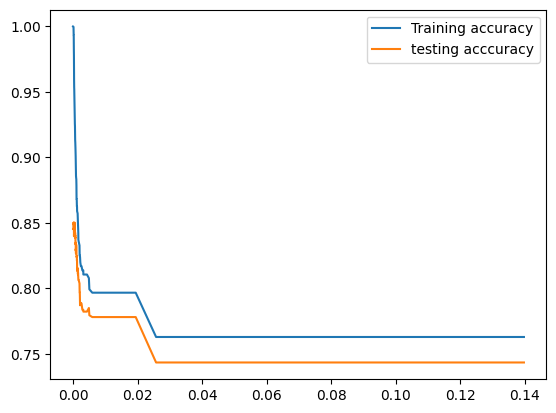

In [104]:
fig,ax=plt.subplots()
ax.plot(ccp_alpha_lst,training_accuracy,label="Training accuracy")
ax.plot(ccp_alpha_lst,testing_accuracy,label="testing acccuracy")
ax.legend()

### best ccp_alpha

In [105]:
ccp_index=testing_accuracy.index(max(testing_accuracy))
ccp_index

best_ccp=ccp_alpha_lst[ccp_index]
best_ccp

0.00017182411756042445

In [106]:
D_tree_with_prun=DecisionTreeClassifier(ccp_alpha=best_ccp,random_state=5)
D_tree_with_prun.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00017182411756042445, random_state=5)

In [107]:
y_pred=D_tree_with_prun.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("D_tree_with_prun")
parameter.append({"ccp_alpha":0.0001718241175})


confusion matrix is
 [[689 109]
 [112 532]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.86      0.86      0.86       798
         Yes       0.83      0.83      0.83       644

    accuracy                           0.85      1442
   macro avg       0.85      0.84      0.84      1442
weighted avg       0.85      0.85      0.85      1442

________________________________________
aacuracy of model is 0.8467406380027739


In [108]:
y_pred=D_tree_with_prun.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[3186   12]
 [  17 2550]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.99      1.00      1.00      3198
         Yes       1.00      0.99      0.99      2567

    accuracy                           0.99      5765
   macro avg       1.00      0.99      0.99      5765
weighted avg       0.99      0.99      0.99      5765

________________________________________
aacuracy of model is 0.9949696444058976


### Random forest with hyperparameter tunning

In [109]:
Random_for=RandomForestClassifier(random_state=7)

hyperparameter={"n_estimators":np.arange(50,200),"criterion":["entropy","gini"],
               "min_samples_split":np.arange(2,10),"min_samples_leaf":np.arange(1,5),
               "max_features":["sqrt","log2"]}
gscv=RandomizedSearchCV(Random_for,hyperparameter,cv=5)
gscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  8...
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199])})

In [110]:
Random_hyp_model=gscv.best_estimator_
Random_hyp_model

RandomForestClassifier(n_estimators=103, random_state=7)

In [111]:
parameters=gscv.best_params_
parameters

{'n_estimators': 103,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'criterion': 'gini'}

In [112]:
y_pred=Random_hyp_model.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("Random_hyp_model")
parameter.append(parameters)


confusion matrix is
 [[727  78]
 [ 74 563]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.91      0.90      0.91       805
         Yes       0.88      0.88      0.88       637

    accuracy                           0.89      1442
   macro avg       0.89      0.89      0.89      1442
weighted avg       0.89      0.89      0.89      1442

________________________________________
aacuracy of model is 0.8945908460471568


In [113]:
y_pred=Random_hyp_model.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[3203    0]
 [   0 2562]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      3203
         Yes       1.00      1.00      1.00      2562

    accuracy                           1.00      5765
   macro avg       1.00      1.00      1.00      5765
weighted avg       1.00      1.00      1.00      5765

________________________________________
aacuracy of model is 1.0


### Adaboost with hyperparameter tunning

In [114]:
Adaboost_model=AdaBoostClassifier(random_state=9)
# base_estimator=None,
#     *,
#     n_estimators=50,
#     learning_rate=1.0,

hyperparameter={"n_estimators":np.arange(10,100),"learning_rate":np.arange(0,2,0.001)}
rscv=RandomizedSearchCV(Adaboost_model,hyperparameter,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=9),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [115]:
Ada_boost_hyp_model=rscv.best_estimator_
Ada_boost_hyp_model

AdaBoostClassifier(learning_rate=1.5290000000000001, n_estimators=42,
                   random_state=9)

In [116]:
parameters=rscv.best_params_
parameters

{'n_estimators': 42, 'learning_rate': 1.5290000000000001}

In [117]:
y_pred=Ada_boost_hyp_model.predict(x_test)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("Ada_boost_hyp_model")
parameter.append(parameters)


confusion matrix is
 [[717  95]
 [ 84 546]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.90      0.88      0.89       812
         Yes       0.85      0.87      0.86       630

    accuracy                           0.88      1442
   macro avg       0.87      0.87      0.87      1442
weighted avg       0.88      0.88      0.88      1442

________________________________________
aacuracy of model is 0.875866851595007


In [118]:
y_pred=Ada_boost_hyp_model.predict(x_train)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[2906  355]
 [ 297 2207]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.91      0.89      0.90      3261
         Yes       0.86      0.88      0.87      2504

    accuracy                           0.89      5765
   macro avg       0.88      0.89      0.89      5765
weighted avg       0.89      0.89      0.89      5765

________________________________________
aacuracy of model is 0.8869037294015611


### knn_with standard_scaler

In [119]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5765 entries, 6931 to 2464
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MinTemp                 5765 non-null   float64
 1   MaxTemp                 5765 non-null   float64
 2   Rainfall                5765 non-null   float64
 3   WindGustSpeed           5765 non-null   float64
 4   WindSpeed9am            5765 non-null   float64
 5   WindSpeed3pm            5765 non-null   float64
 6   Humidity9am             5765 non-null   float64
 7   Humidity3pm             5765 non-null   float64
 8   Pressure9am             5765 non-null   float64
 9   Pressure3pm             5765 non-null   float64
 10  Cloud9am                5765 non-null   float64
 11  Cloud3pm                5765 non-null   float64
 12  Temp9am                 5765 non-null   float64
 13  Temp3pm                 5765 non-null   float64
 14  Location_Albury         5765 non-null

In [120]:
x_train1=x_train.iloc[:,0:14]
x_train2=x_train.iloc[:,14:]
x_train2=x_train2.reset_index(drop=True)
x_train2
# x_train.info()

,Location_Albury,Location_BadgerysCreek,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5760,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5761,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5762,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5763,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
std_scaler=StandardScaler()
array=std_scaler.fit_transform(x_train1)
x_train1=pd.DataFrame(array,columns=x_train1.columns)
x_train1
x_train_std=pd.concat([x_train1,x_train2],axis=1)
x_train_std

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,1.098577,0.564364,0.329864,1.780474,0.214995,-0.611016,-0.574953,1.756378,-1.068331,-0.951013,...,0,0,0,0,0,0,0,0,0,0
1,-0.365513,-0.228135,-0.383504,0.400782,-0.119073,-0.491995,-0.984411,-0.702466,-0.690124,-0.750090,...,0,0,0,0,0,0,0,0,0,0
2,0.212406,0.473557,-0.383504,-0.626111,-1.057917,-0.188867,0.085358,-0.284055,1.017038,0.751692,...,0,0,0,0,0,0,0,0,0,0
3,-0.229532,-1.075195,0.820489,1.240968,1.758615,0.872078,1.214559,1.064160,-1.667730,-1.038894,...,0,1,0,0,0,0,0,0,0,0
4,-1.453360,-0.409116,-0.383504,-1.279589,-0.682379,-1.552941,0.025926,-0.888427,1.513136,1.488142,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5760,0.178411,0.670163,-0.383504,-0.812819,-0.119073,-0.491995,-1.103275,-0.888427,0.316664,0.217404,...,0,0,0,0,0,0,1,0,0,0
5761,-0.399508,0.090216,-0.383504,1.614384,-0.306842,-0.491995,-0.865548,-0.655976,0.783580,0.679490,...,0,0,1,0,0,0,0,0,0,0
5762,-1.436363,-0.611754,-0.383504,-1.186235,-1.433454,-0.188867,1.333422,0.180847,1.892506,1.632544,...,0,0,0,0,0,0,0,0,0,0
5763,-0.057686,0.312640,-0.034396,-0.861872,-0.227808,-1.289633,0.538984,-0.479863,-1.489425,-1.392967,...,0,0,0,0,0,0,0,0,0,0


In [122]:
x_test1=x_test.iloc[:,0:14]
x_test2=x_test.iloc[:,14:]
x_test2=x_test2.reset_index(drop=True)
x_test2

,Location_Albury,Location_BadgerysCreek,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1440,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [123]:
std_scaler=StandardScaler()
array=std_scaler.fit_transform(x_test1)
x_test1=pd.DataFrame(array,columns=x_train1.columns)
x_test1
x_test_std=pd.concat([x_test1,x_test2],axis=1)
x_test_std

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,1.266671,0.719094,-0.171578,-0.766755,0.219351,-1.082194,0.379174,0.001181,-0.327831,-0.094520,...,0,0,0,0,0,0,0,0,0,0
1,0.860294,0.985810,-0.385030,1.265308,-0.148058,0.418858,-0.106293,-0.474222,0.306136,0.006768,...,1,0,0,0,0,0,0,0,0,0
2,-0.680553,0.680153,-0.385030,0.618742,-0.331763,0.418858,-0.955860,-0.949626,1.271494,0.802602,...,0,0,0,0,0,0,0,0,0,0
3,-1.323984,-1.096838,-0.385030,-0.582022,-0.148058,0.118648,-0.652444,-0.236521,0.162053,0.050177,...,0,0,0,0,1,0,0,0,0,0
4,0.623240,0.495455,-0.385030,-0.212556,-0.148058,0.719069,-0.773810,0.001181,-0.399872,-0.080050,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,-0.895149,0.088721,-0.378511,0.981761,-0.312528,1.179863,0.506894,1.104564,-1.604816,-1.085201,...,0,0,0,0,0,0,0,0,0,0
1438,-0.350789,-0.605518,-0.010769,0.521821,0.761405,0.171150,1.236361,0.420730,1.750266,1.706345,...,0,0,0,0,0,0,0,0,0,0
1439,-0.485350,-0.948298,-0.359974,-1.424571,-1.433990,-1.851005,0.875728,1.032591,0.952021,1.362514,...,0,0,0,0,0,0,0,0,0,0
1440,-1.391713,-0.255131,-0.038170,-0.120189,0.586760,0.118648,-1.137910,-1.234868,0.277319,0.209344,...,0,0,0,0,0,1,0,0,0,0


In [124]:
knn_model=KNeighborsClassifier()
hyperparameter={"n_neighbors":np.arange(3,30),"p":[1,2]}

gscv=RandomizedSearchCV(knn_model,hyperparameter,cv=5)
gscv.fit(x_train_std,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]})

In [125]:
knn_std_scal_model=gscv.best_estimator_
knn_std_scal_model

KNeighborsClassifier(n_neighbors=4)

In [126]:
parameters=gscv.best_params_
parameters

{'p': 2, 'n_neighbors': 4}

In [127]:
y_pred=knn_std_scal_model.predict(x_test_std)
confu_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_test)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_test)
print("aacuracy of model is",accu_score)

testing_acc.append(accu_score)
model_name.append("knn_std_scal_model")
parameter.append(parameters)


confusion matrix is
 [[593  33]
 [208 608]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.74      0.95      0.83       626
         Yes       0.95      0.75      0.83       816

    accuracy                           0.83      1442
   macro avg       0.84      0.85      0.83      1442
weighted avg       0.86      0.83      0.83      1442

________________________________________
aacuracy of model is 0.8328710124826629


In [128]:
y_pred=knn_std_scal_model.predict(x_train_std)
confu_matrix=confusion_matrix(y_pred,y_train)
print("confusion matrix is\n",confu_matrix)

print("_"*40)

classific_report=classification_report(y_pred,y_train)
print("classification report is\n",classific_report)

print("_"*40)

accu_score=accuracy_score(y_pred,y_train)
print("aacuracy of model is",accu_score)

training_acc.append(accu_score)


confusion matrix is
 [[2701   42]
 [ 502 2520]]
________________________________________
classification report is
               precision    recall  f1-score   support

          No       0.84      0.98      0.91      2743
         Yes       0.98      0.83      0.90      3022

    accuracy                           0.91      5765
   macro avg       0.91      0.91      0.91      5765
weighted avg       0.92      0.91      0.91      5765

________________________________________
aacuracy of model is 0.9056374674761491


In [129]:
df=pd.DataFrame({"model_name":model_name,"training_accuracy":training_acc,"testing_accuracy":testing_acc,"best_param":parameter})

In [135]:
df["variance"]=df["training_accuracy"]-df["testing_accuracy"]
df.sort_values("variance").reset_index(drop=True)

,model_name,training_accuracy,testing_accuracy,best_param,variance
0,Logistic_model,0.810234,0.805825,defalt,0.004409
1,Adaboost_model,0.895230,0.884882,defalt,0.010348
2,Ada_boost_hyp_model,0.886904,0.875867,"{'n_estimators': 42, 'learning_rate': 1.529000...",0.011037
3,knn_model,0.907025,0.838419,defalt,0.068606
4,knn_std_scal_model,0.905637,0.832871,"{'p': 2, 'n_neighbors': 4}",0.072766
5,knn_hyp_model,0.935820,0.859223,"{'n_neighbors': 4, 'p': 2}",0.076596
6,Random_hyp_model,1.000000,0.894591,"{'n_estimators': 103, 'min_samples_split': 2, ...",0.105409
7,Random_forest,1.000000,0.893897,defalt,0.106103
8,D_tree_hyp_model,0.947441,0.837032,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.110410
9,D_tree_with_prun,0.994970,0.846741,{'ccp_alpha': 0.0001718241175},0.148229


### user input

In [137]:
columns=x_train.columns

In [138]:
project_data={"columns":list(x_train.columns)}
project_data

{'columns': ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'Location_Albury',
  'Location_BadgerysCreek',
  'WindGustDir_E',
  'WindGustDir_ENE',
  'WindGustDir_ESE',
  'WindGustDir_N',
  'WindGustDir_NE',
  'WindGustDir_NNE',
  'WindGustDir_NNW',
  'WindGustDir_NW',
  'WindGustDir_S',
  'WindGustDir_SE',
  'WindGustDir_SSE',
  'WindGustDir_SSW',
  'WindGustDir_SW',
  'WindGustDir_W',
  'WindGustDir_WNW',
  'WindGustDir_WSW',
  'WindDir9am_E',
  'WindDir9am_ENE',
  'WindDir9am_ESE',
  'WindDir9am_N',
  'WindDir9am_NE',
  'WindDir9am_NNE',
  'WindDir9am_NNW',
  'WindDir9am_NW',
  'WindDir9am_S',
  'WindDir9am_SE',
  'WindDir9am_SSE',
  'WindDir9am_SSW',
  'WindDir9am_SW',
  'WindDir9am_W',
  'WindDir9am_WNW',
  'WindDir9am_WSW',
  'WindDir3pm_E',
  'WindDir3pm_ENE',
  'WindDir3pm_ESE',
  'WindDir3pm_N',
  'WindDir3pm_N

In [142]:
x_train.iloc[:,0:15].head(1).T

,6931
MinTemp,17.013501
MaxTemp,5.087968
Rainfall,5.332514
WindGustSpeed,51.779144
WindSpeed9am,8.779144
WindSpeed3pm,10.214711
Humidity9am,67.889572
Humidity3pm,92.889572
Pressure9am,1010.307970
Pressure3pm,1008.308585


In [151]:
MinTemp=17.013501
MaxTemp=5.087968
Rainfall=5.332514
WindGustSpeed=51.779144
WindSpeed9am=8.779144
WindSpeed3pm=10.214711
Humidity9am=67.889572
Humidity3pm=92.889572
Pressure9am=1010.307970
Pressure3pm=1008.308585
Cloud9am=6.376685
Cloud3pm=7.977914
Temp9am=21.525773
Temp3pm=19.836201
Location="Albury"
WindGustDir="ESE"
WindDir9am="SW"

In [148]:
array=np.zeros(len(project_data["columns"]))
# array

In [152]:
Location1="Location_"+Location
WindGustDir1="WindGustDir_"+WindGustDir
WindDir9am1="WindDir9am_"+WindDir9am

In [153]:
index_value1=project_data["columns"].index(Location1)
index_value2=project_data["columns"].index(WindGustDir1)
index_value3=project_data["columns"].index(WindDir9am1)

In [155]:
array[0]=MinTemp
array[1]=MaxTemp
array[2]=Rainfall
array[3]=WindGustSpeed
array[4]=WindSpeed9am
array[5]=WindSpeed3pm
array[6]=Humidity9am
array[7]=Humidity3pm
array[8]=Pressure9am
array[9]=Pressure3pm
array[10]=Cloud9am
array[11]=Cloud3pm
array[12]=Temp9am
array[13]=Temp3pm
array[index_value1]=1
array[index_value2]=1
array[index_value3]=1
array

array([1.70135010e+01, 5.08796800e+00, 5.33251400e+00, 5.17791440e+01,
       8.77914400e+00, 1.02147110e+01, 6.78895720e+01, 9.28895720e+01,
       1.01030797e+03, 1.00830858e+03, 6.37668500e+00, 7.97791400e+00,
       2.15257730e+01, 1.98362010e+01, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [160]:
prediction=Ada_boost_hyp_model.predict([array])[0]
prediction
if prediction=="Yes":
    
    print("There will be rain tommorow in Albury")
    
else:
    print("There will be  no rain tommorow in Albury")


There is rain tommorow in Albury


### pickle files

In [161]:
import pickle
import json
with open("Ada_boost_hyp_model.pkl","wb")as f:
    pickle.dump(Ada_boost_hyp_model,f)
    
with open("project_data.json","w")as f:
    json.dump(project_data,f) 
    